In [ ]:
import pandas as pd

# Load files
philly = pd.read_csv("Philadelphia Dataset.csv")
nyc = pd.read_csv("New York Dataset.csv")
sf = pd.read_csv("San Francisco Dataset.csv", low_memory=False)

# 🧼 Keep only useful columns & rename them

# Philly
philly_clean = philly[['title', 'department_name', 'base_salary',
                       'overtime_gross_pay_qtd', 'miscellaneous_gross_pay_qtd']].copy()
philly_clean.columns = ['job_title', 'department', 'base_salary', 'overtime_pay', 'other_pay']
philly_clean['city'] = 'Philadelphia'

# NYC
nyc_clean = nyc[['Title Description', 'Agency Name', 'Base Salary',
                 'Total OT Paid', 'Total Other Pay']].copy()
nyc_clean.columns = ['job_title', 'department', 'base_salary', 'overtime_pay', 'other_pay']
nyc_clean['city'] = 'New York'

# SF
sf_clean = sf[['Job', 'Department', 'Salaries', 'Overtime', 'Other Salaries']].copy()
sf_clean.columns = ['job_title', 'department', 'base_salary', 'overtime_pay', 'other_pay']
sf_clean['city'] = 'San Francisco'

# Merge all three
df_all = pd.concat([philly_clean, nyc_clean, sf_clean], ignore_index=True)

# Clean up salary columns: convert to numeric & drop rows with missing salary or job title
df_all['base_salary'] = pd.to_numeric(df_all['base_salary'], errors='coerce')
df_all['overtime_pay'] = pd.to_numeric(df_all['overtime_pay'], errors='coerce')
df_all['other_pay'] = pd.to_numeric(df_all['other_pay'], errors='coerce')
df_all = df_all.dropna(subset=['base_salary', 'job_title'])

# Preview
print(df_all.shape)
df_all.head()

(2734996, 6)


,job_title,department,base_salary,overtime_pay,other_pay,city
0,Deputy Sheriff Captain,SHF Sheriff,95557.0,NaN,1400.00,Philadelphia
1,Police Sergeant,PPD Police,94674.0,NaN,-4036.47,Philadelphia
2,Deputy Sheriff Captain,SHF Sheriff,92550.0,NaN,0.00,Philadelphia
3,Police Officer 1,PPD Police,73433.0,NaN,-1716.09,Philadelphia
4,Firefighter,PFD Fire,83048.0,10636.58,43048.77,Philadelphia


In [ ]:
print(df_all.shape)
df_all.head()

(2734996, 6)


,job_title,department,base_salary,overtime_pay,other_pay,city
0,Deputy Sheriff Captain,SHF Sheriff,95557.0,NaN,1400.00,Philadelphia
1,Police Sergeant,PPD Police,94674.0,NaN,-4036.47,Philadelphia
2,Deputy Sheriff Captain,SHF Sheriff,92550.0,NaN,0.00,Philadelphia
3,Police Officer 1,PPD Police,73433.0,NaN,-1716.09,Philadelphia
4,Firefighter,PFD Fire,83048.0,10636.58,43048.77,Philadelphia


In [ ]:
# Save the final cleaned and merged file
df_all.to_csv("placeholder.csv", index=False)

# Optional: download it to your computer directly from Colab
from google.colab import files
files.download("placeholder.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_all['city'].value_counts()

,count
city,
New York,1048565
San Francisco,1010316
Philadelphia,676115


In [ ]:
print("Philly:", philly_clean.shape)
print("NYC:", nyc_clean.shape)
print("SF:", sf_clean.shape)

Philly: (711117, 6)
NYC: (1048575, 6)
SF: (1010321, 6)


In [ ]:
df = pd.read_csv("placeholder.csv")

job_title
Physician Administrator, DPH           468446.000
Assistant Medical Examiner (Hourly)    461177.600
COO - Retirement System                405320.350
Chf Executive & Investment Ofc         399830.010
Chief Medical Examiner                 398919.705
Sup Psychiatric Physician Spec         393067.775
Administrator, DPH                     378179.000
CHANCELLOR                             363346.000
PENSION INVESTMENT ADVISOR             350000.000
Chief of Police                        342566.000
Name: base_salary, dtype: float64
department
Law Library                       174150.09
City Attorney                     151491.05
Dept of Building Inspection       146210.73
Technology                        139575.04
LLB Law Library                   130500.00
OFFICE OF COLLECTIVE BARGAININ    129217.00
Emergency Management              126590.47
Dept of Early Childhood           123578.36
Police                            123534.96
Retirement System                 123122.50
Name:

<ipython-input-10-9d3779c656f6>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_by_title.values, y=median_by_title.index, palette='viridis')


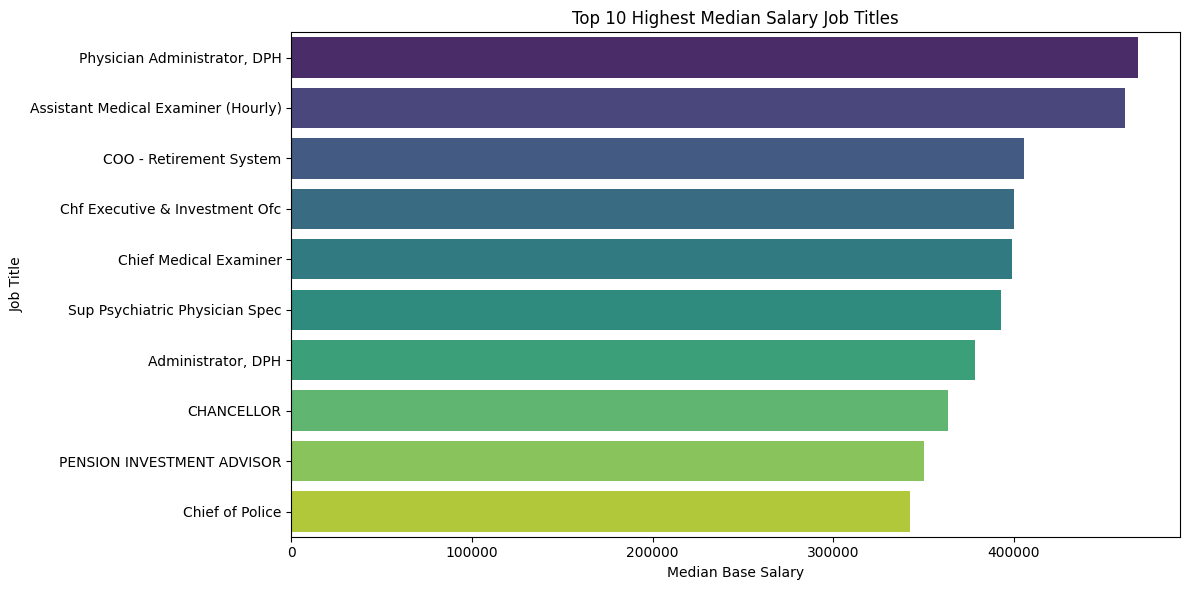

<ipython-input-10-9d3779c656f6>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='base_salary', data=df, palette='pastel')


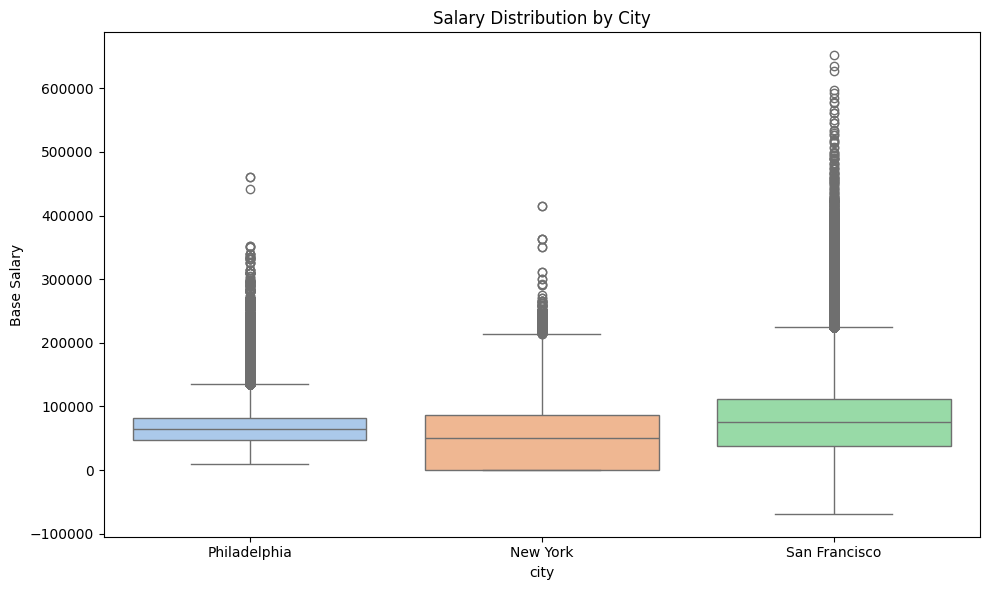

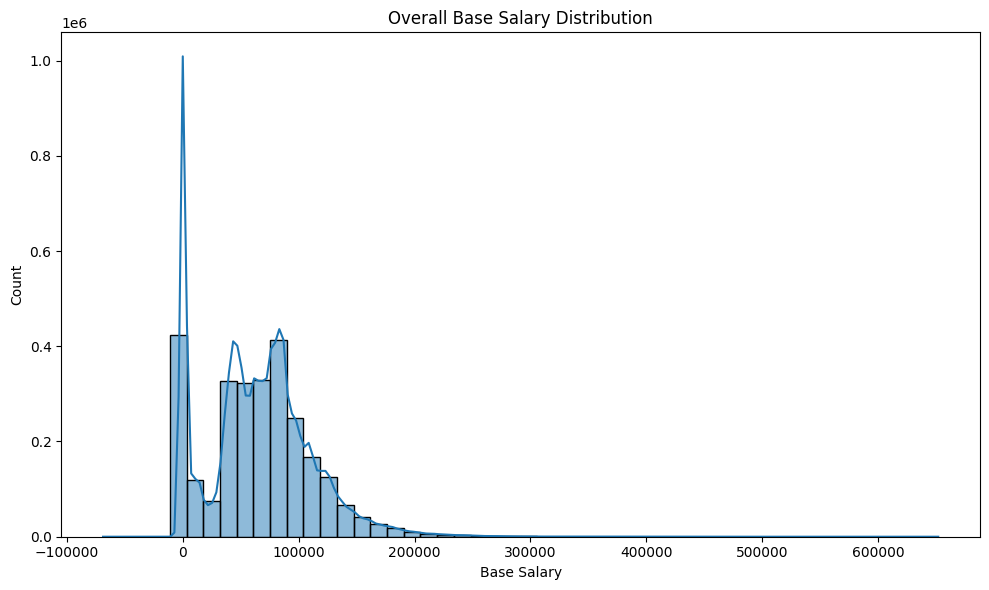

In [ ]:
# Analysis including medians

# Assuming df is already loaded, columns needed from the csv file:
# ['job_title', 'department', 'base_salary', 'overtime_pay', 'other_pay', 'city']

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring all columns are correct
df.columns

# Check for any nulls and remove rows with missing salary or job title
df = df.dropna(subset=['base_salary', 'job_title'])

# Convert salary fields to numeric in case they are strings
df['base_salary'] = pd.to_numeric(df['base_salary'], errors='coerce')
df['overtime_pay'] = pd.to_numeric(df['overtime_pay'], errors='coerce')
df['other_pay'] = pd.to_numeric(df['other_pay'], errors='coerce')

# 1. Median salary by job title
median_by_title = df.groupby('job_title')['base_salary'].median().sort_values(ascending=False).head(10)
print(median_by_title)

# 2. Median salary by department
median_by_department = df.groupby('department')['base_salary'].median().sort_values(ascending=False).head(10)
print(median_by_department)

# 3. Median salary by city
median_by_city = df.groupby('city')['base_salary'].median()
print(median_by_city)

# Visuals:

# 🔹 Bar Plot: Top 10 Paying Job Titles
plt.figure(figsize=(12,6))
sns.barplot(x=median_by_title.values, y=median_by_title.index, palette='viridis')
plt.title('Top 10 Highest Median Salary Job Titles')
plt.xlabel('Median Base Salary')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

# 🔹 Boxplot: Salary by City
plt.figure(figsize=(10,6))
sns.boxplot(x='city', y='base_salary', data=df, palette='pastel')
plt.title('Salary Distribution by City')
plt.ylabel('Base Salary')
plt.tight_layout()
plt.show()

# 🔹 Histogram: Salary Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['base_salary'], bins=50, kde=True)
plt.title('Overall Base Salary Distribution')
plt.xlabel('Base Salary')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# ML Model:

# Get feature names
encoded_features = rf_pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)
all_features = list(encoded_features) + numeric_cols

# Get importances
importances = rf_pipeline.named_steps['model'].feature_importances_

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': all_features, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='magma')
plt.title('Top 10 Most Important Features for Predicting Salary')
plt.tight_layout()
plt.show()